# 1.データの取り込み

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
display(train.head())
display(test.head())

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,16542,vauxhall,GTC,2015,Manual,29188,Petrol,160.0,47.1,1.4,8927
1,12581,merc,CLS Class,2016,Automatic,44753,Diesel,125.0,57.7,2.1,17500
2,13317,merc,V Class,2019,Manual,100,Diesel,145.0,46.3,2.1,25000
3,12797,toyota,Supra,2019,Automatic,10,Petrol,145.0,34.5,3.0,49499
4,13941,hyundi,Santa Fe,2017,Semi-Auto,28847,Diesel,240.0,42.8,2.2,21499


,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,14530,merc,GLS Class,2019,Semi-Auto,29,Diesel,145.0,34.0,3.0
1,12614,ford,Grand C-MAX,2016,Manual,16271,Diesel,30.0,64.2,1.5
2,15195,skoda,Yeti,2015,Manual,22758,Petrol,125.0,51.4,1.2
3,18116,skoda,Scala,2020,Semi-Auto,1000,Petrol,145.0,47.1,1.0
4,13959,vw,Amarok,2015,Automatic,32800,Diesel,260.0,35.3,2.0


# 2.データ探索


In [4]:
print("========train==========")
print(train.info())
print(train.describe())
print(train.isnull().sum())
print(train.shape)
print("========test==========")
print(test.info())
print(test.describe())
print(test.isnull().sum())
print(test.shape)

========train==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6105 entries, 0 to 6104
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         6105 non-null   int64  
 1   brand         6105 non-null   object 
 2   model         6105 non-null   object 
 3   year          6105 non-null   int64  
 4   transmission  6105 non-null   object 
 5   mileage       6105 non-null   int64  
 6   fuelType      6105 non-null   object 
 7   tax           6105 non-null   float64
 8   mpg           6105 non-null   float64
 9   engineSize    6105 non-null   float64
 10  price         6105 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 524.8+ KB
None
              carID         year        mileage          tax          mpg  \
count   6105.000000  6105.000000    6105.000000  6105.000000  6105.000000   
mean   15819.259623  2016.766912   24526.805569   151.928747    50.177363   
std     22

## 2.0 予測するカラムの分布確認

<Axes: xlabel='price', ylabel='Count'>

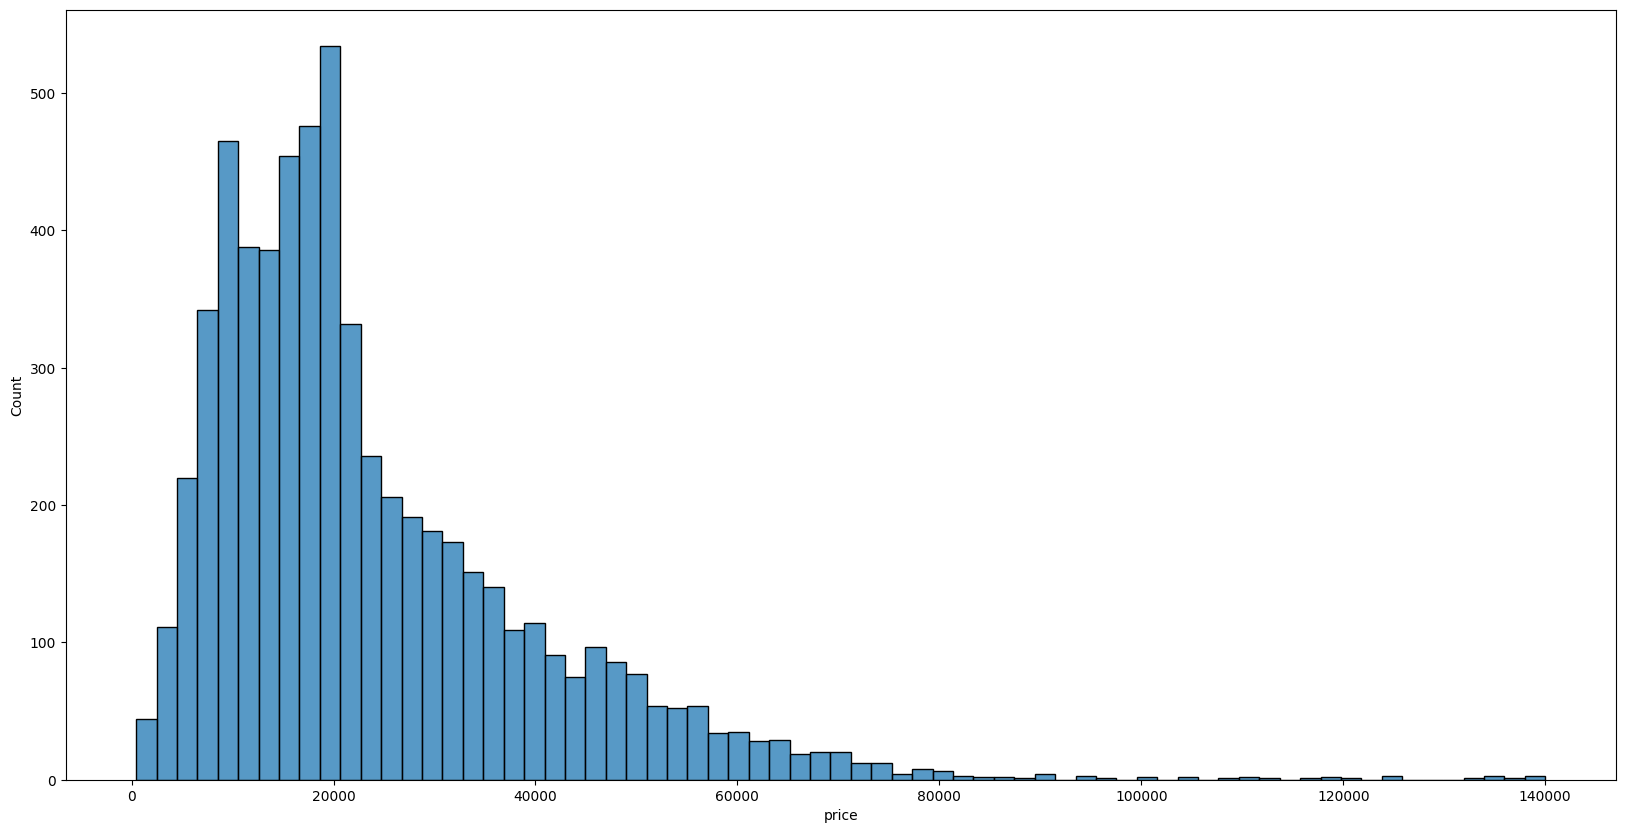

In [5]:
#まずは予測する[price]の分布を確認する
fig = plt.subplots(figsize=(20,10))
sns.histplot(train["price"])

## 2.1-brand

## 2.2-year

brand,audi,bmw,ford,hyundi,merc,skoda,toyota,vauxhall,vw
count,421.000000,780.000000,949.000000,647.000000,990.000000,510.000000,586.000000,306.000000,916.000000
mean,42789.320665,38325.685897,16043.797682,14715.309119,30461.701010,13971.301961,18812.129693,12151.356209,21953.262009
std,21693.826770,17625.811089,8518.696787,8443.798651,17935.145431,5093.178892,9821.236988,4360.894586,11169.095662
min,4650.000000,1995.000000,795.000000,1200.000000,1695.000000,2495.000000,1200.000000,450.000000,899.000000
25%,26995.000000,23993.750000,9995.000000,8498.000000,18412.500000,9495.000000,12246.250000,8705.750000,13301.500000
50%,39995.000000,35800.000000,16620.000000,11485.000000,25998.500000,14982.500000,17809.500000,13495.000000,20587.500000
75%,52850.000000,49980.000000,20950.000000,18493.000000,39950.000000,17995.000000,23467.500000,14995.000000,27994.250000
max,137995.000000,99950.000000,48999.000000,40365.000000,139995.000000,23999.000000,59995.000000,27995.000000,69994.000000


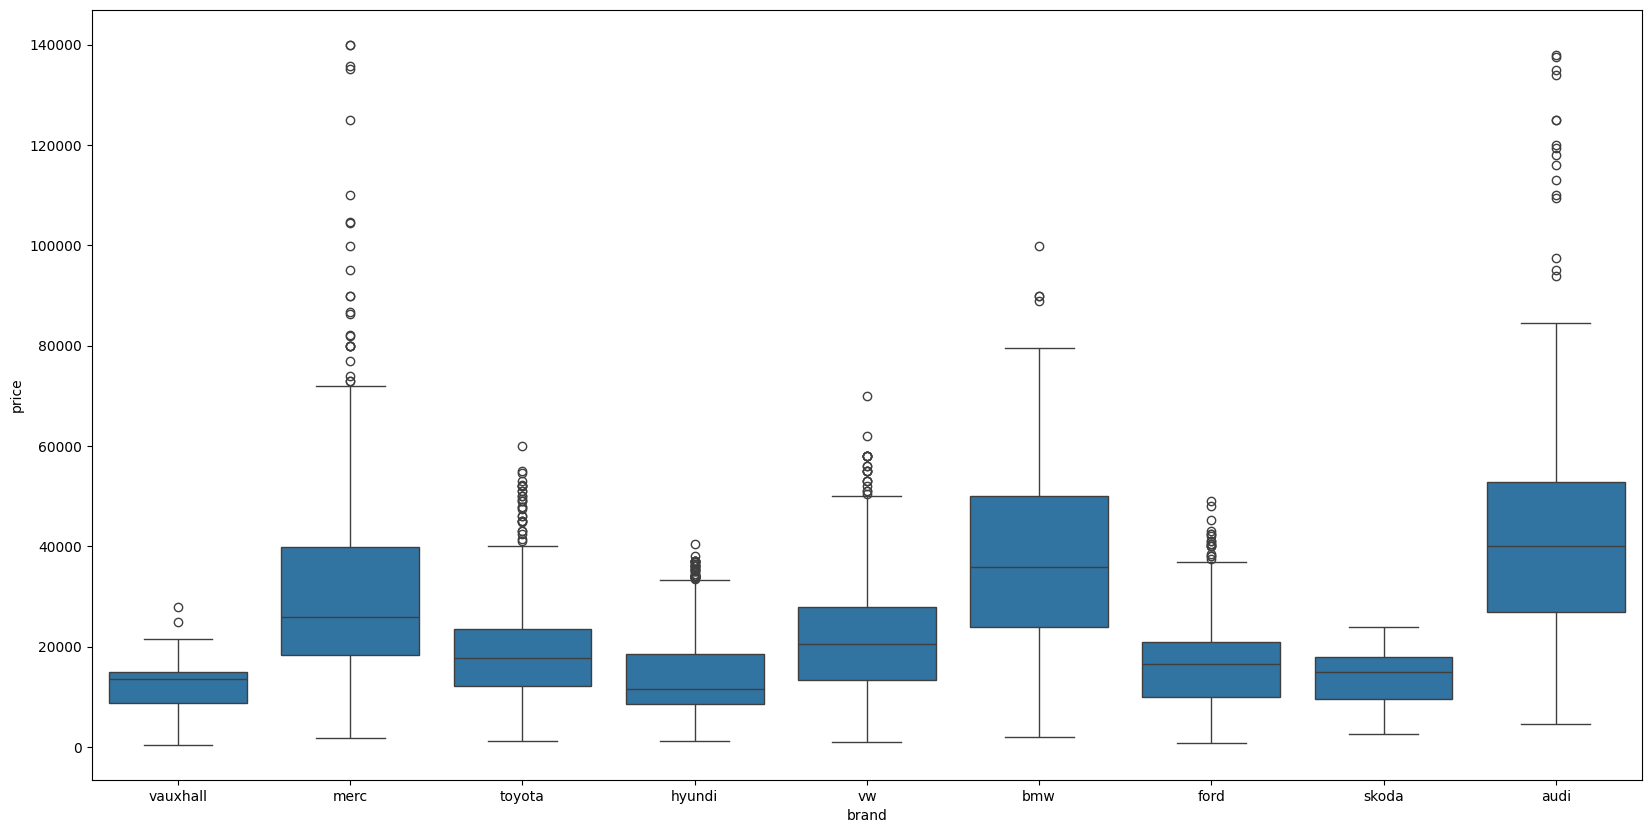

In [6]:
#brand
fig = plt.subplots(figsize=(20,10))
sns.boxplot(x="brand",y="price",data=train)
train.groupby("brand").describe()["price"].T
#低価格ブランド、中価格ブランド、高ブランドに分けることもできる


In [7]:
train.query("year == 1970")

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
1437,17140,merc,M Class,1970,Automatic,14000,Diesel,305.0,39.2,0.0,24999


In [8]:
#modelが「M=Class」が古いモデルかもしれないので確認
train[train["model"] == " M Class"]


,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
442,15577,merc,M Class,2012,Automatic,54632,Diesel,200.0,44.8,2.1,15299
467,14061,merc,M Class,2015,Semi-Auto,43339,Diesel,200.0,39.2,2.1,21498
512,16589,merc,M Class,2014,Semi-Auto,42218,Diesel,200.0,46.3,2.1,19420
515,17692,merc,M Class,2015,Semi-Auto,71000,Diesel,200.0,46.3,2.1,18495
529,14277,merc,M Class,2015,Semi-Auto,43910,Petrol,570.0,23.9,5.5,32250
630,15930,merc,M Class,2014,Automatic,34525,Diesel,305.0,39.2,3.0,21944
777,18808,merc,M Class,2015,Automatic,46023,Diesel,205.0,39.2,2.1,21643
1298,13290,merc,M Class,2009,Automatic,59000,Diesel,555.0,30.4,3.0,9990
1437,17140,merc,M Class,1970,Automatic,14000,Diesel,305.0,39.2,0.0,24999
1658,13584,merc,M Class,2013,Automatic,66426,Diesel,300.0,39.2,3.0,15890


year,1970,1997,1998,1999,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,1.0,2.000000,5.000000,2.0,5.000000,9.000000,11.000000,17.000000,13.000000,15.000000,...,65.000000,65.000000,222.000000,321.000000,547.000000,930.000000,976.000000,657.000000,1694.000000,425.000000
mean,24999.0,4300.000000,9582.000000,3995.0,2965.800000,4871.111111,3292.363636,7451.705882,5110.307692,6384.933333,...,7597.415385,9814.738462,10892.486486,12569.585670,15431.345521,16928.708602,19617.289959,26525.608828,34972.947462,37719.896471
std,NaN,494.974747,9534.795226,0.0,2328.143187,4151.445364,1491.597618,6319.190274,3861.101362,4909.403666,...,3951.215256,6478.551039,6687.342629,8481.682819,9060.951655,9255.583545,9985.118647,15645.708156,17298.255905,18160.367404
min,24999.0,3950.000000,1990.000000,3995.0,899.000000,1200.000000,450.000000,1395.000000,1495.000000,1095.000000,...,2890.000000,2495.000000,2975.000000,3076.000000,3990.000000,4500.000000,7000.000000,8135.000000,9000.000000,14985.000000
25%,24999.0,4125.000000,1990.000000,3995.0,1295.000000,2695.000000,2395.000000,3399.000000,1995.000000,3095.000000,...,5395.000000,5750.000000,6762.250000,7490.000000,8990.500000,10851.750000,12493.750000,16725.000000,21998.250000,21769.000000
50%,24999.0,4300.000000,3950.000000,3995.0,1695.000000,3790.000000,3495.000000,4990.000000,4990.000000,4995.000000,...,5999.000000,8699.000000,8997.000000,9999.000000,13495.000000,14999.500000,17998.000000,21500.000000,31492.500000,34993.000000
75%,24999.0,4475.000000,19990.000000,3995.0,4990.000000,4990.000000,3820.000000,8750.000000,5895.000000,7045.000000,...,9995.000000,12495.000000,13685.000000,15990.000000,19699.000000,19987.500000,22062.500000,33990.000000,44989.500000,48630.000000
max,24999.0,4650.000000,19990.000000,3995.0,5950.000000,14995.000000,5990.000000,19950.000000,13990.000000,17999.000000,...,22995.000000,44990.000000,54850.000000,59990.000000,99850.000000,99950.000000,89990.000000,139995.000000,139948.000000,137995.000000


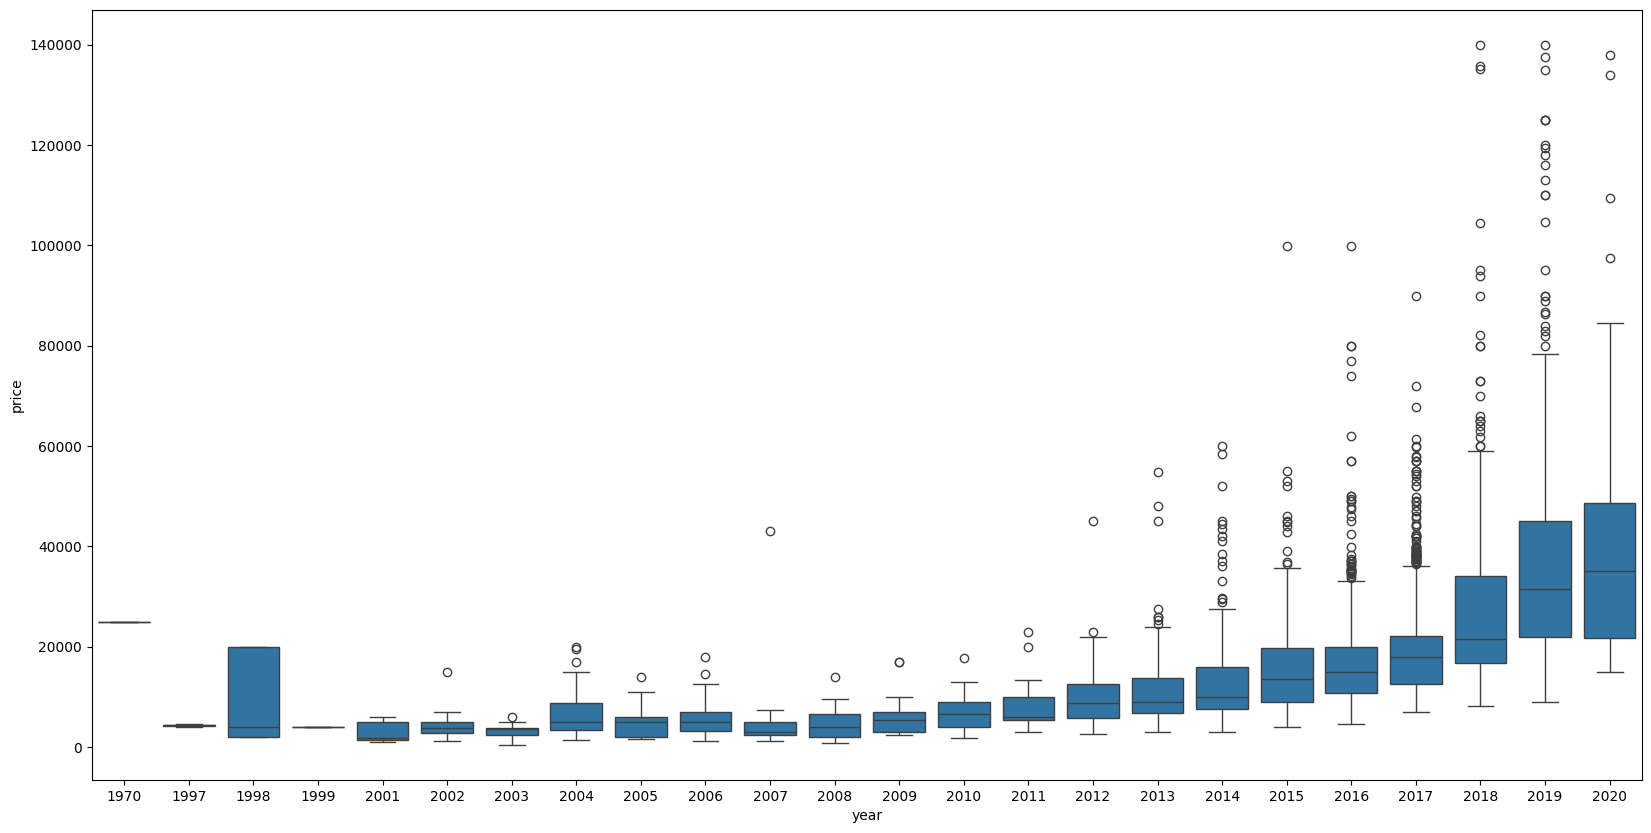

In [12]:
#year
fig = plt.subplots(figsize=(20,10))
sns.boxplot(x="year",y="price",data=train)
train.groupby("year").describe()["price"].T
#古ければ安く、新けえば高い傾向がある

## 2.3-transmission

transmission,Automatic,Manual,Other,Semi-Auto
count,2069.000000,2325.000000,2.000000,1709.000000
mean,27663.277429,13123.635269,14497.000000,33359.742539
std,16630.528174,6154.999315,2124.148771,17603.511080
min,899.000000,450.000000,12995.000000,5995.000000
25%,16790.000000,8498.000000,13746.000000,20450.000000
50%,23000.000000,12450.000000,14497.000000,30181.000000
75%,35989.000000,17450.000000,15248.000000,41999.000000
max,139948.000000,52995.000000,15999.000000,139995.000000


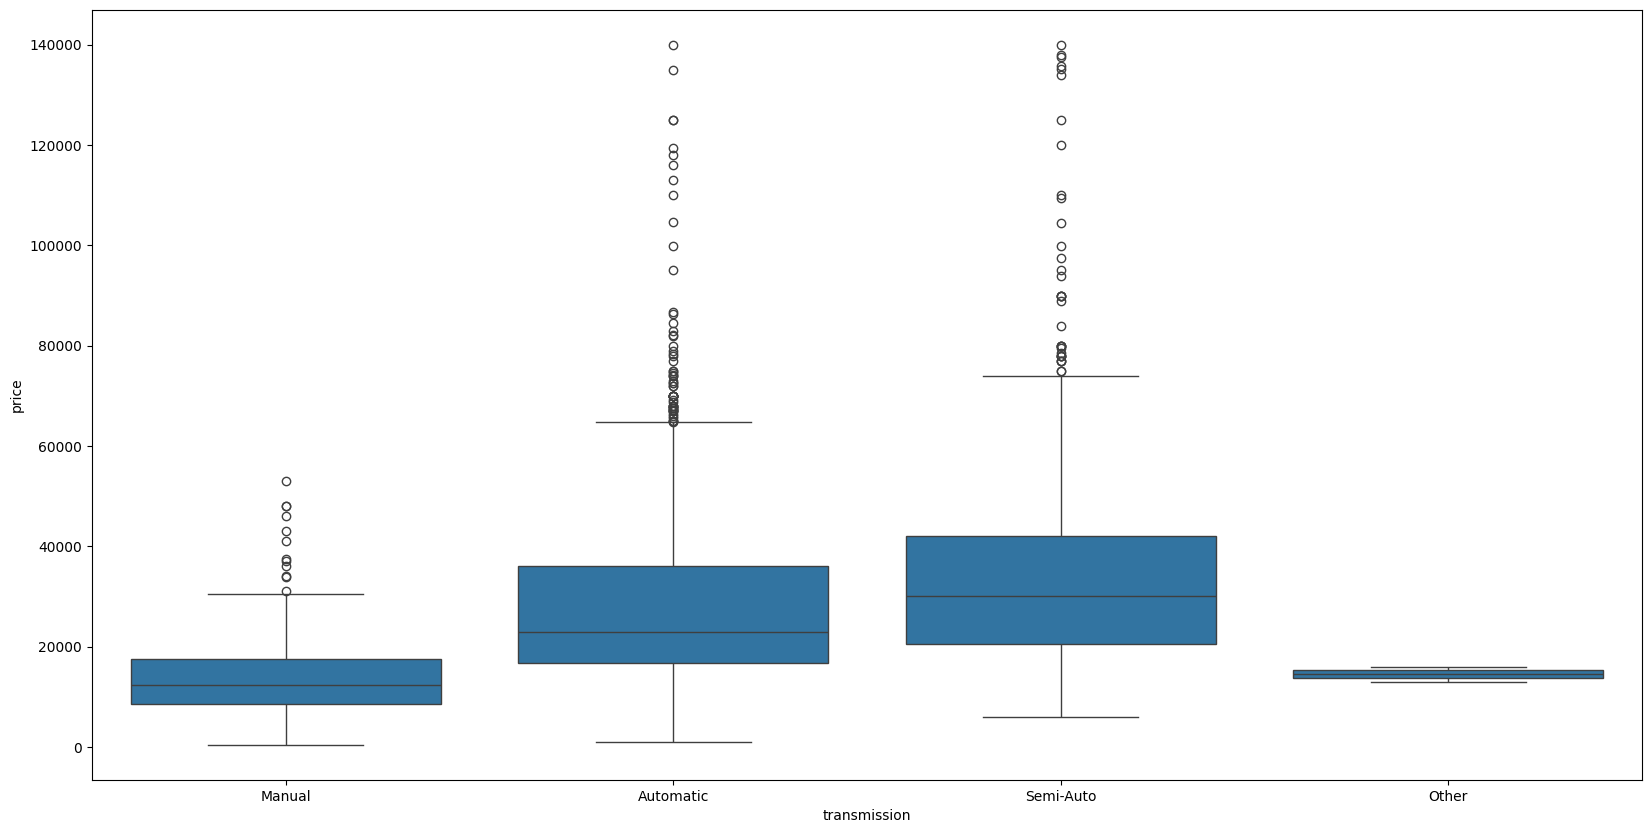

In [17]:
# transmission
fig = plt.subplots(figsize=(20,10))
sns.boxplot(x="transmission",y="price",data=train)
train.groupby("transmission").describe()["price"].T
#後にダミー化する

## 2.4-mileage

PearsonRResult(statistic=np.float64(-0.4922272383072996), pvalue=np.float64(0.0))

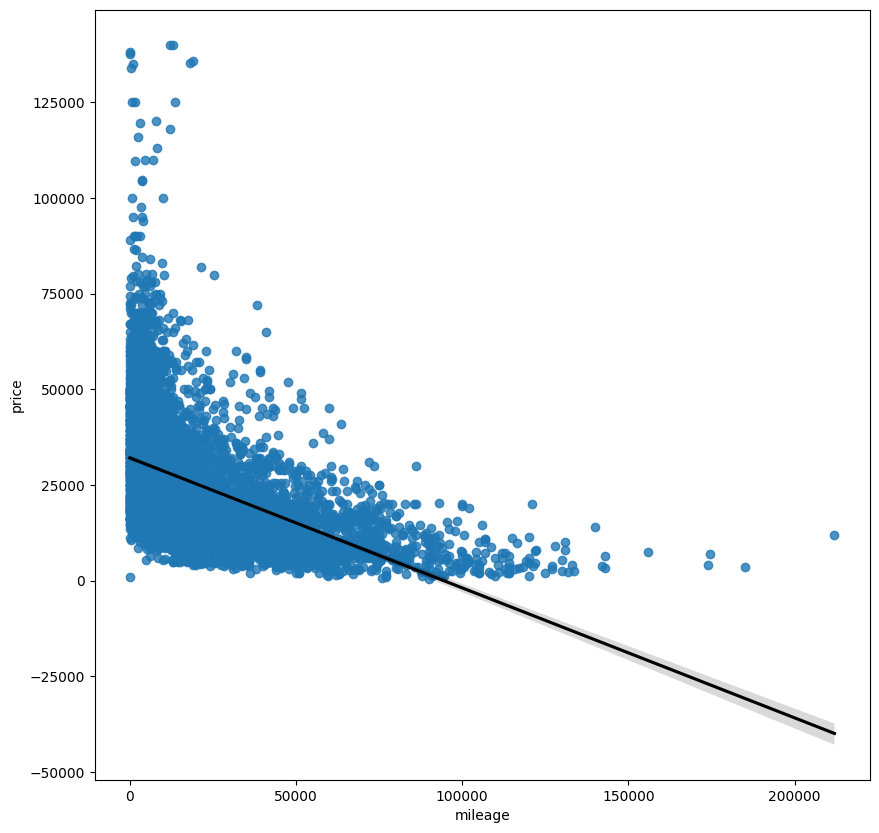

In [25]:
# mileage
fig = plt.subplots(figsize=(10,10))
sns.regplot(data=train,x="mileage",y="price",line_kws={"color":"black"})

#相関係数の算出 + 検定の実施
from scipy import stats
stats.pearsonr(train["mileage"],train["price"])
# 中等度の府の相関がある
# 総関形状ではないため、mileageを対数変換してみる(重回帰分析をするため)

PearsonRResult(statistic=np.float64(-0.45374481024298813), pvalue=np.float64(7.036204741272906e-308))

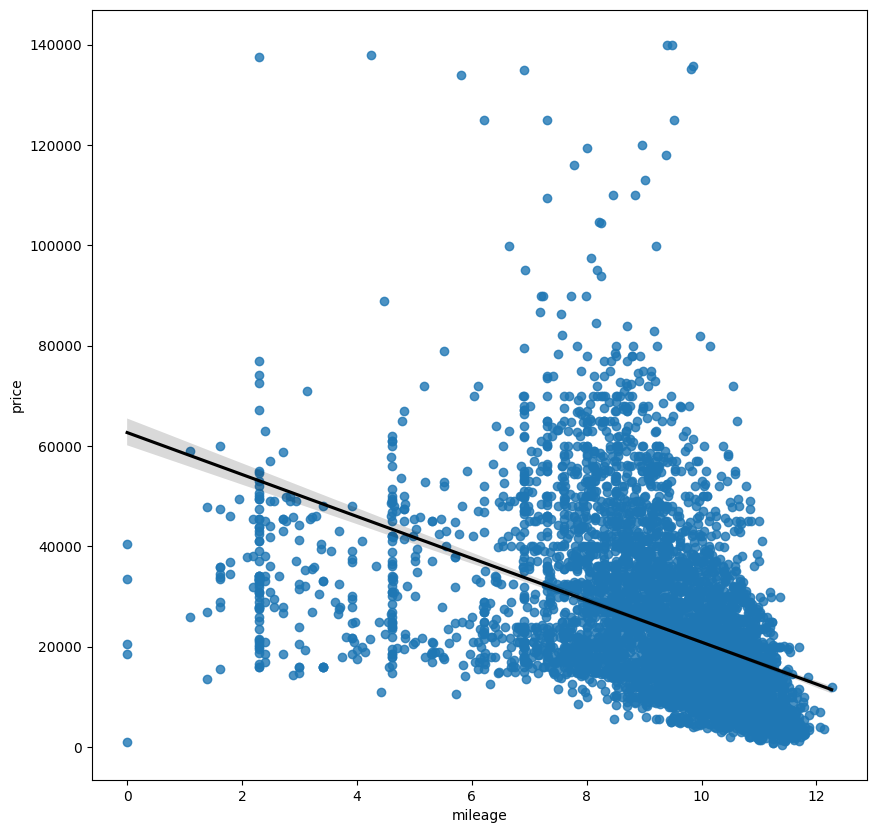

In [32]:
#mileage(対数変換)
adhoc_data = train[["price","mileage"]].copy()
adhoc_data["mileage"] = np.log(adhoc_data["mileage"])

# グラフ
fig = plt.subplots(figsize=(10,10))
sns.regplot(data=adhoc_data,x="mileage",y="price",line_kws={"color":"black"})

# 相関係数の算出 + 検定の実施
from scipy import stats
stats.pearsonr(adhoc_data["mileage"],adhoc_data["price"])

PearsonRResult(statistic=np.float64(0.5310723061243036), pvalue=np.float64(0.0))

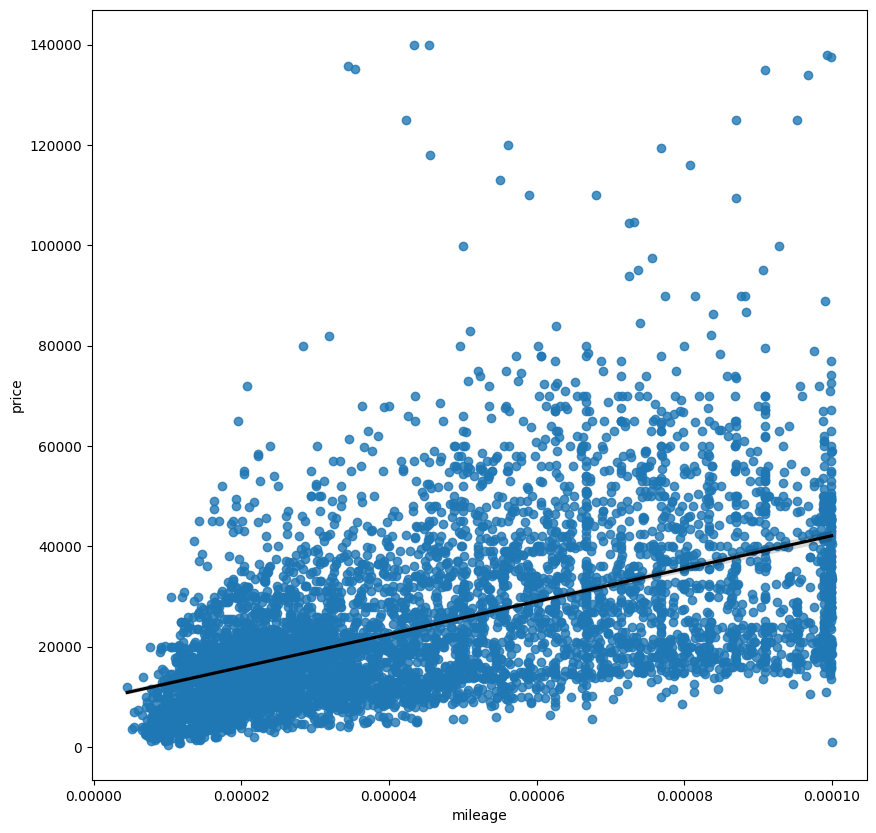

In [34]:
# mileage(逆数変換する)
# 反比例していたため、逆数変換も試す(無限にあるので数学に強い人は色々試す)
adhoc_data = train[["price","mileage"]].copy()
adhoc_data ["mileage"] = 1 / (adhoc_data["mileage"] + 10000) #足す係数は10,100など色々試して10000が1番綺麗だったので採用

# グラフ
fig = plt.subplots(figsize=(10,10))
sns.regplot(data=adhoc_data,x="mileage",y="price",line_kws={"color":"black"})

#相関係数の算出 + 検定の実施
from scipy import stats
stats.pearsonr(adhoc_data["mileage"],adhoc_data["price"])


## 2.5-fuelType

fuelType,Diesel,Electric,Hybrid,Other,Petrol
count,3724.000000,2.000000,242.000000,28.000000,2109.000000
mean,24359.136412,18199.500000,22199.619835,20800.892857,22799.436226
std,14395.080325,1130.663743,11491.796533,8919.036139,19865.235304
min,1695.000000,17400.000000,2495.000000,7250.000000,450.000000
25%,13998.750000,17799.750000,17495.750000,16925.000000,9790.000000
50%,19999.000000,18199.500000,19736.500000,19140.000000,16250.000000
75%,31995.000000,18599.250000,23224.750000,22430.000000,29998.000000
max,84496.000000,18999.000000,74226.000000,59995.000000,139995.000000


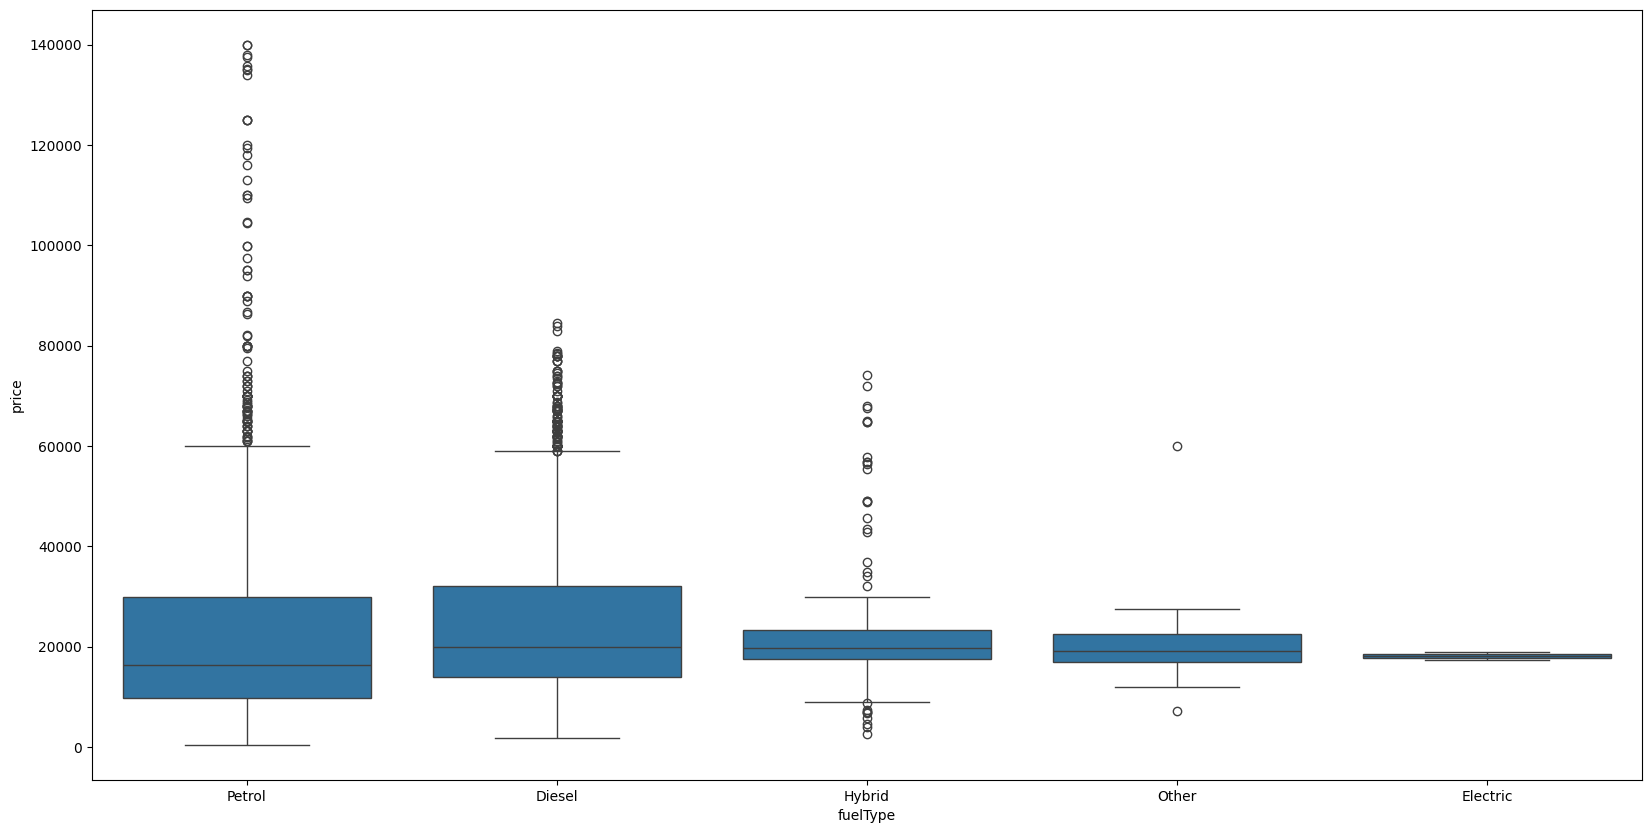

In [37]:

fig = plt.subplots(figsize=(20,10))
sns.boxplot(x="fuelType",y="price",data=train)
train.groupby("fuelType").describe()["price"].T
# fuelTypeによって中央値の差はあまりないが、データのばらつき具合(分散)が変わる印象
# 重要性は低そう

## 2.6-tax

PearsonRResult(statistic=np.float64(0.14927497328232425), pvalue=np.float64(9.28004660572323e-32))

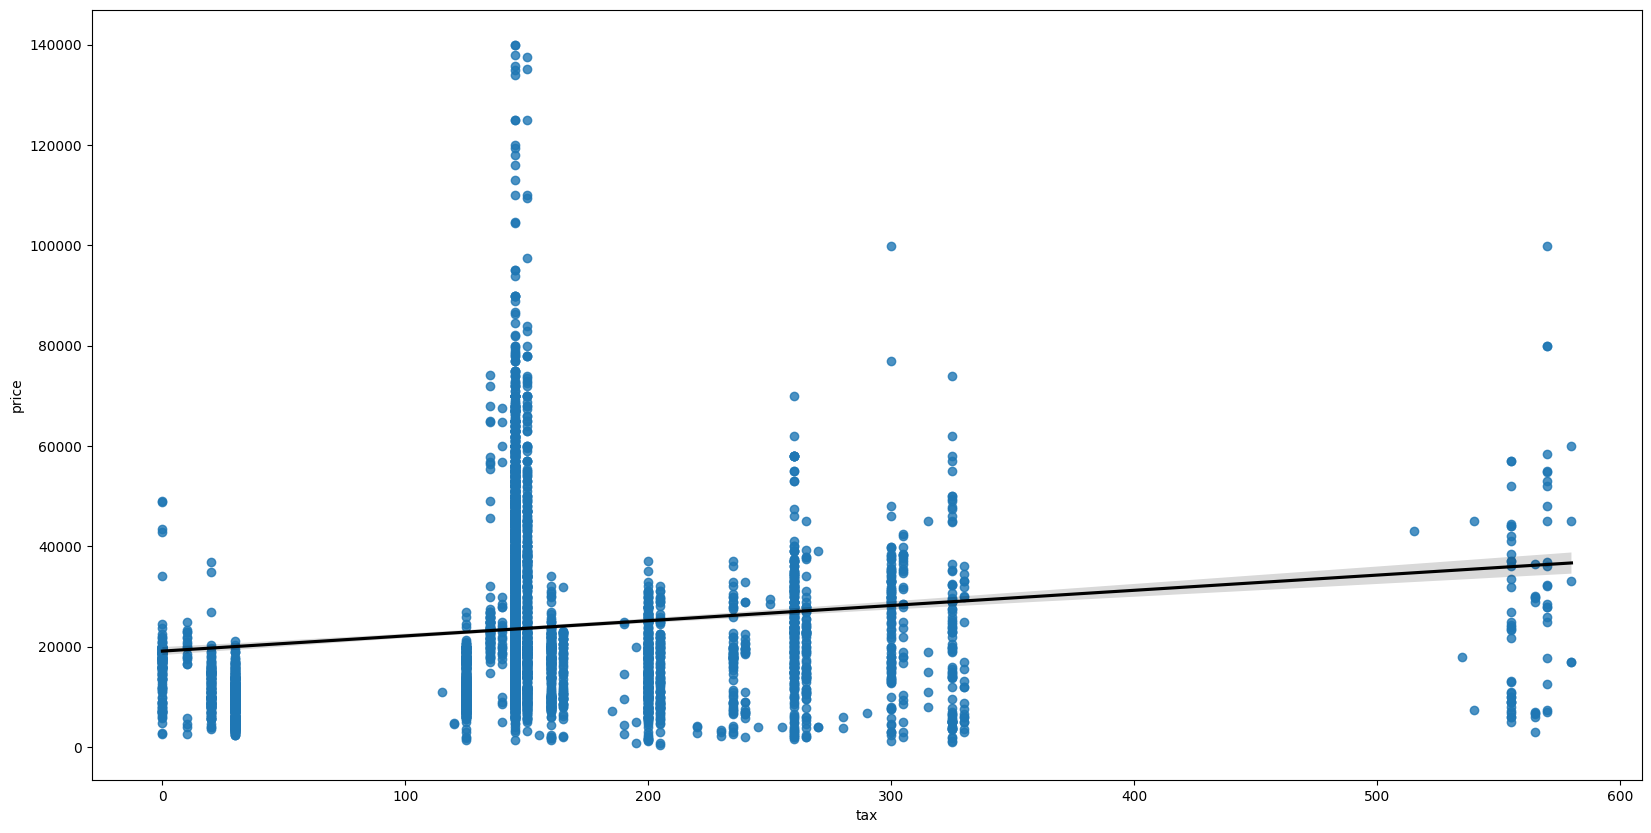

In [40]:
#tax
fig = plt.subplots(figsize=(20,10))
sns.regplot(data=train,x="tax",y="price",line_kws={"color":"black"})

# 相関係数の算出 + 検定の実施
from scipy import stats
stats.pearsonr(train["tax"],train["price"])
# taxとpriceの大きな相関はない
#　特徴量から省くか、「tax<100,100<tax<200,200<tax」の3カテゴリーにしてしまうのが良い

## 2.7-mpg


PearsonRResult(statistic=np.float64(-0.18020910861823136), pvalue=np.float64(9.97763203131252e-46))

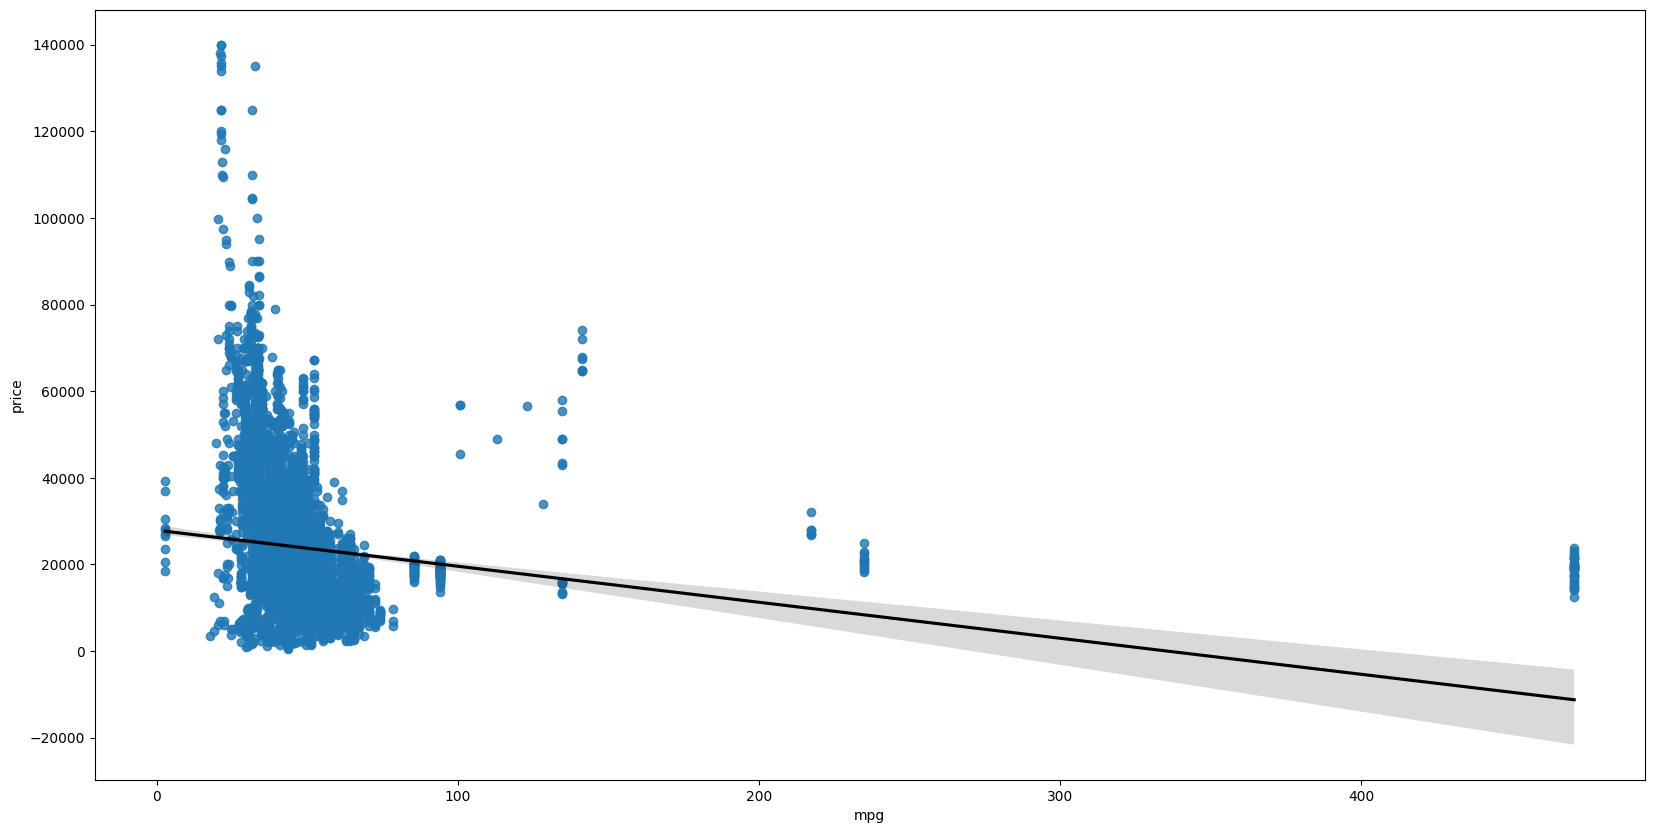

In [45]:
#mpg
fig = plt.subplots(figsize=(20,10))
sns.regplot(data=train,x="mpg",y="price",line_kws={"color":"black"})

#相関係数の算出 + 検定の実施
from scipy import stats
stats.pearsonr(train["mpg"],train["price"])

PearsonRResult(statistic=np.float64(-0.40886411009706397), pvalue=np.float64(9.444412350178056e-245))

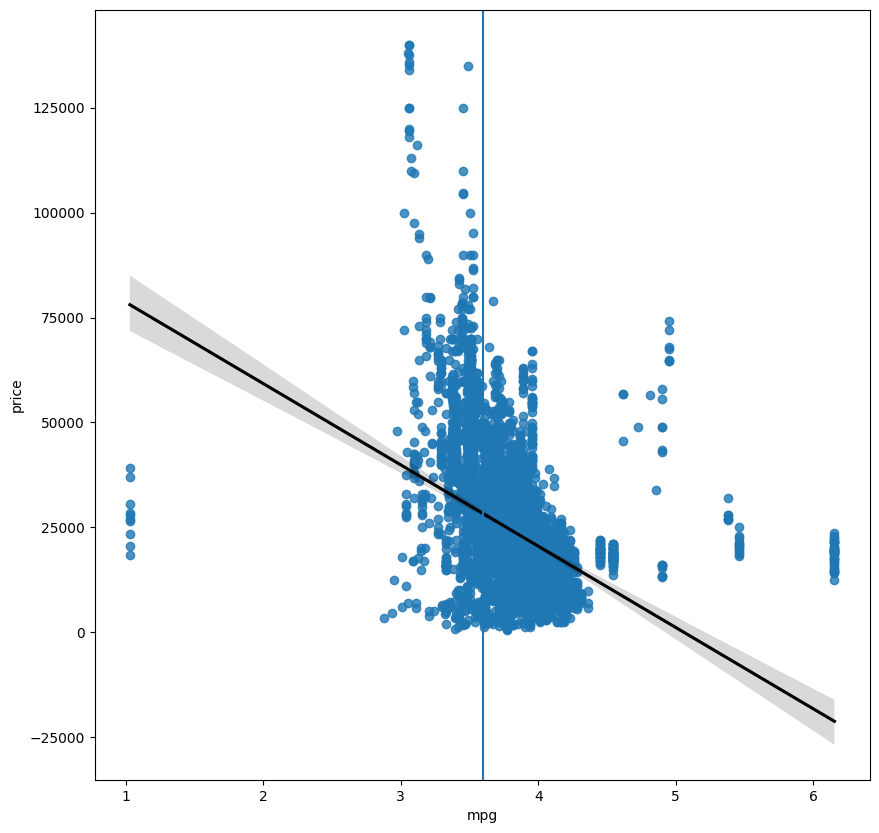

In [50]:
#mpg対数変換
adhoc_data = train[["price","mpg"]].copy()
adhoc_data["mpg"] = np.log(adhoc_data["mpg"])

# グラフ
fig = plt.subplots(figsize=(10,10))
sns.regplot(data=adhoc_data,x="mpg",y="price",line_kws={"color":"black"})
plt.axvline(x=3.6)
# 相関係数の算出 + 検定の実施
from scipy import stats
stats.pearsonr(adhoc_data["mpg"],adhoc_data["price"])

#相関はありそだが、グラフは微妙
#対数変換したmpgで「(3.6以下),（3.6~4.0）,（4.0以上）」の3カテゴリーに分ける方法を検討


## 2.8-engineSize

PearsonRResult(statistic=np.float64(0.6245875272667682), pvalue=np.float64(0.0))

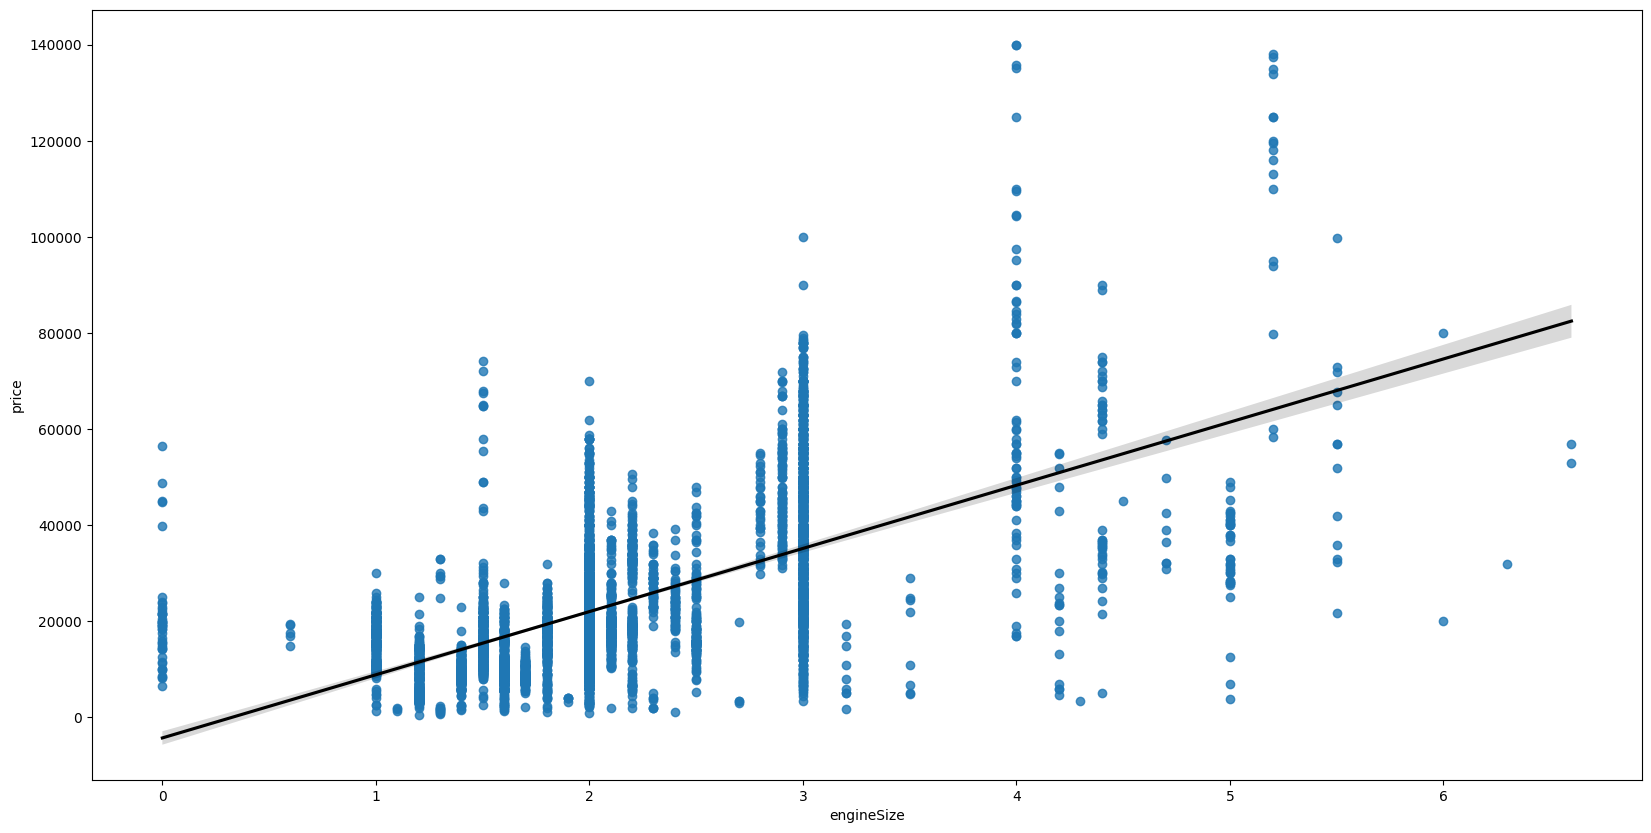

In [54]:
# engineSize
fig = plt.subplots(figsize=(20,10))
sns.regplot(data=train,x="engineSize",y="price",line_kws={"color":"black"})

# 相関係数の算出 + 検定の実施
from scipy import stats
stats.pearsonr(train["engineSize"],train["price"])
# これは綺麗なのでそのままでok。やや高めの正の相関


In [59]:
import seaborn as sns

sns.set_palette("Set1")


## 2.8- model

<Axes: xlabel='model', ylabel='price'>

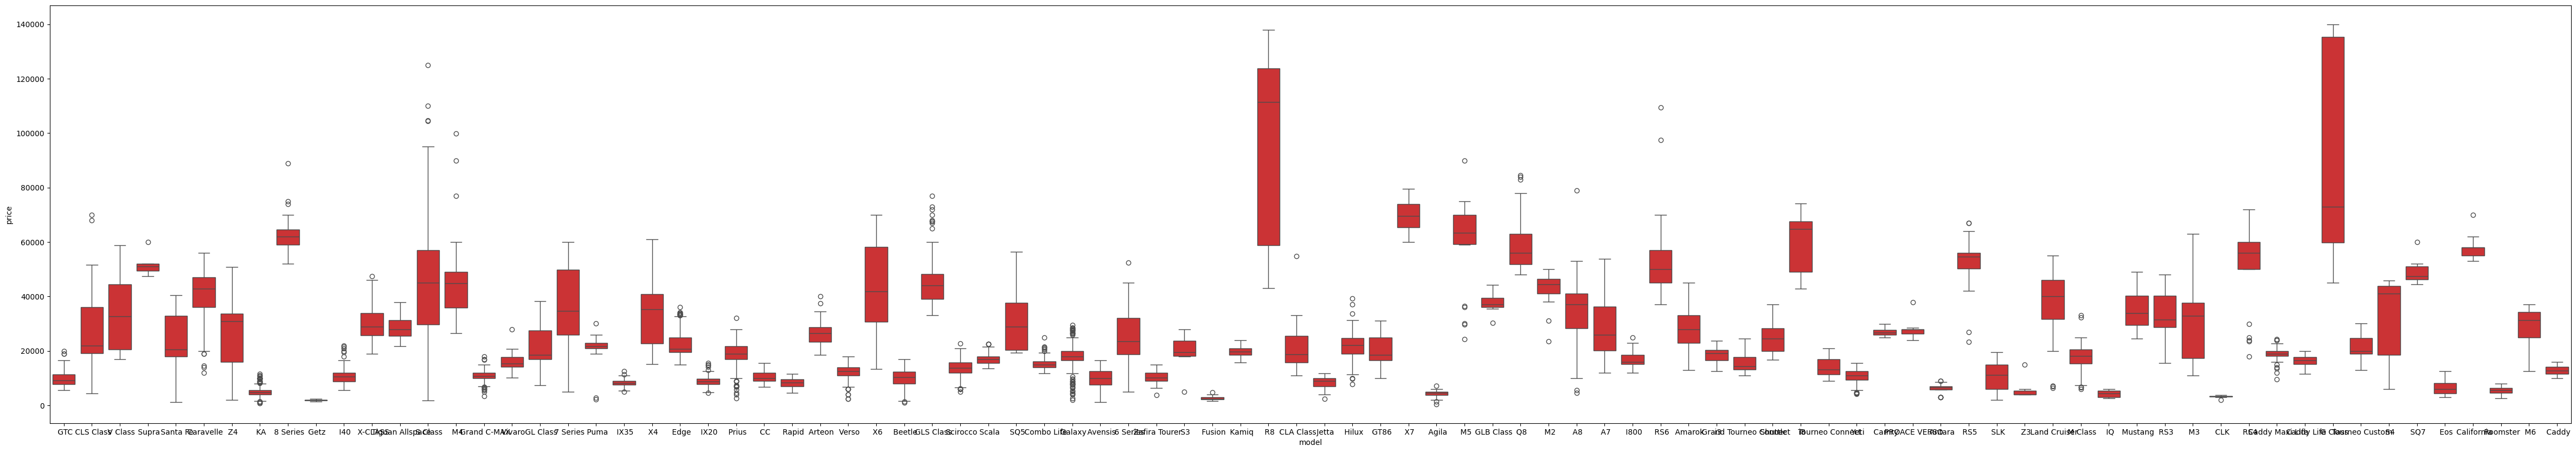

In [60]:
# model
fig = plt.subplots(figsize=(60,10))
sns.boxplot(x="model",y="price",data=train)
# 各モデルの値段の中央値を特徴料として利用することができる(target_encoding)


# 3.機械学習の前処理

In [ ]:
続きを後ほどする

# 4.予測と評価